<a href="https://colab.research.google.com/github/harveyvn/Data-Analysis-with-Automobile-EDA/blob/master/Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of content

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#scrollTo=FoUIFTnN7LOh">Import Data from Module</a></li>
    <li><a href="#scrollTo=en_FmLjC7iUi">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="#scrollTo=0OVQeJza7qO6">Descriptive Statistical Analysis</a></li>
    <li><a href="#scrollTo=nG8sFbKD7wXm">Basics of Grouping</a></li>
    <li><a href="#scrollTo=g3OqmbMo7z46">Correlation and Causation</a></li>
    <li><a href="#scrollTo=TIElcvZf74dW">ANOVA</a></li>
</ol>
    
</div>
 
<hr>

## 1) Import Data

In [0]:
import pandas as pd
import numpy as np

In [0]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 2) Analyzing Individual Feature Patterns using Visualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [0]:
# Question 01: What is the data type of the column "peak-rpm"?

df[['peak-rpm']].dtypes

peak-rpm    float64
dtype: object

In [0]:
# Calculate the correlation between variables of type int64 and float64
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [0]:
# Question 02: Find the correlation between the following columns: bore, stroke,
# compression-ration, and horsepower

df_q2 = df[['bore', 'stroke', 'compression-ratio', 'horsepower']]
df_q2.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### 1.1. Relationship between Engine Size and Price

In [0]:
# Draw the scatter plot to visualize the relationship 
# between "engine-size" and "price"

df[['engine-size', 'price']].head()

,engine-size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


Text(0, 0.5, 'Price')

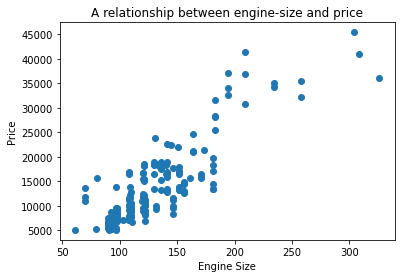

In [0]:
x = df['engine-size'] # independent var
y = df['price'] # dependent var

plt.scatter(x, y)
plt.title("A relationship between engine-size and price")
plt.xlabel('Engine Size')
plt.ylabel('Price')

In [0]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


(0.0, 53908.7736176247)

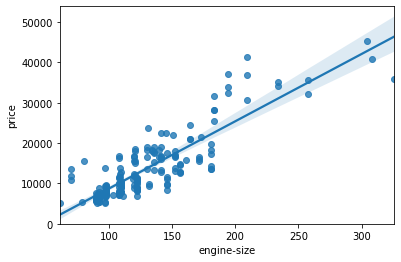

In [0]:
# Using seaborn to draw a scatter plot
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0, )

### 1.2. Relationship between highway and price

In [0]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


(0.0, 48172.08301599301)

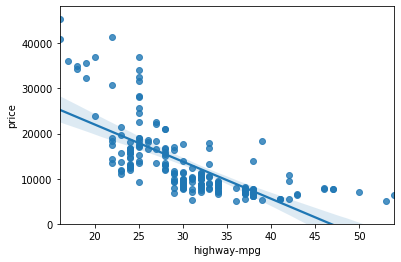

In [0]:
# Using seaborn to draw a scatter plot
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

### 1.3. Relationship between peak-rpm and price

In [0]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


(0.0, 47414.1)

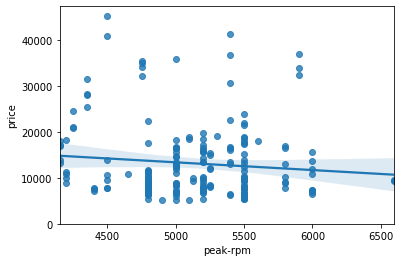

In [0]:
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

### 1.4. Relationship between stroke and price

In [0]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


(0.0, 47414.1)

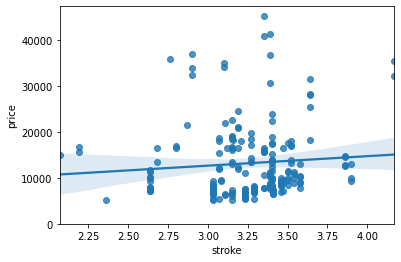

In [0]:
sns.regplot(x='stroke', y='price', data=df)
plt.ylim(0,)

### 1.5. Box Plot

**Comment:**
- A good way to visualize categorical variables is by using **boxplot**
- Categorical variables can have a type 'object' or 'int64'

**Code:**


```
sns.boxplot(x='body-style', y='price', data=df)
plt.ylim(0,)
```


Let's look at the relationship between <code>body-style</code> and <code>price</code>



In [0]:
df[['body-style']].dtypes

body-style    object
dtype: object

(0.0, 47414.1)

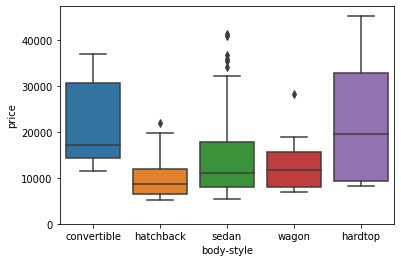

In [0]:
sns.boxplot(x='body-style', y='price', data=df)
plt.ylim(0,)

**Comment:** 
We can see that the distribution of price between different body-style categories have a significant overlap

**==> body-style not a good predictor of price**

Let's look at the relationship between <code>engine-location</code> and <code>price</code>

In [0]:
df[['engine-location']].dtypes

engine-location    object
dtype: object

(0.0, 47414.1)

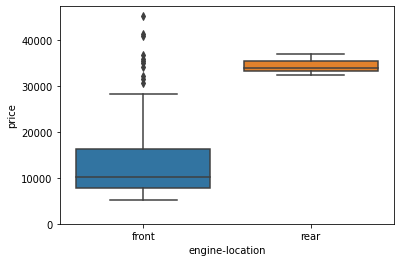

In [0]:
sns.boxplot(x='engine-location', y='price', data=df)
plt.ylim(0,)

**Comment:** We see that the distribution of price between these two engine-location categories, front and rear, are distinct enough 

**==> engine-location is a potential good predictor of price**

Let's look at the relationship between <code>drive-wheel</code> and <code>price</code>

(0.0, 47414.1)

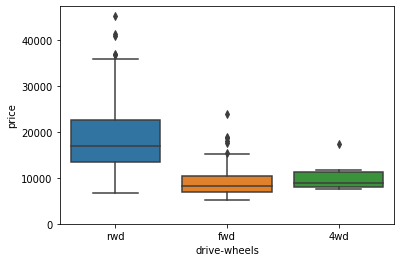

In [0]:
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.ylim(0,)

## 3) Descriptive Statistical Analysis

The **describe** function automatically computes basic statistics for all continous variables

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>

In [0]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [0]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [0]:
df[['drive-wheels']].describe()

,drive-wheels
count,201
unique,3
top,fwd
freq,118


In [0]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [0]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts

,drive-wheels
fwd,118
rwd,75
4wd,8


In [0]:
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, 
                           inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [0]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [0]:
print(df[['engine-location']].describe())
print(df['engine-location'].value_counts())
engine_location_counts = df['engine-location'].value_counts().to_frame()
engine_location_counts

       engine-location
count              201
unique               2
top              front
freq               198
front    198
rear       3
Name: engine-location, dtype: int64


,engine-location
front,198
rear,3


In [0]:
engine_location_counts.rename(columns={'engine-location':'value_counts'},
                              inplace= True)
engine_location_counts.index.name = 'engine-location'
engine_location_counts

,value_counts
engine-location,
front,198
rear,3


## 4) Basics of Grouping

In [0]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

### Task 1: 1 col and 1 col
- Retrieve the average price for each category of drive-wheels by using **groupby**

In [0]:
df_group_one = df[['drive-wheels', 'price']]
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [0]:
df_group_two = df[['body-style', 'price']]
df_group_two = df_group_two.groupby(['body-style'], as_index=False).mean()
df_group_two

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


### Task 2: 2 cols and 1 col
- Retrive the average price of each category and body style by using **groupby**

In [0]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]
df_group_one = df_group_one.groupby(['drive-wheels', 'body-style'], 
                                    as_index=False).mean()
df_group_one

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


### Task 3: Visualization

In [0]:
df_pivot = df_group_one.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [0]:
# Fill missing value with 0
df_pivot.fillna(0)

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

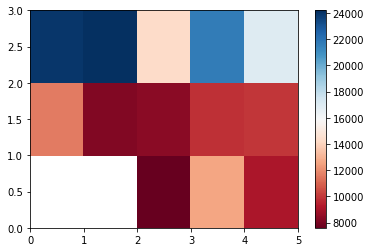

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

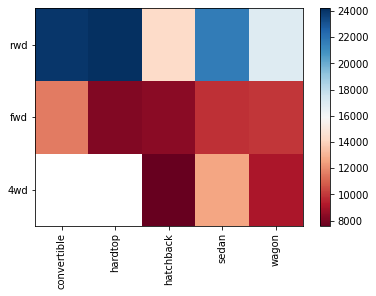

In [0]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## 5) Correlation and Causation

<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

<p>P-value by convention, when the</p>
<ul>
    <li>p-value is $<$ 0.001: strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: no evidence that the correlation is significant.</li>
</ul>

In [0]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [0]:
from scipy import stats

print(stats.pearsonr(df['horsepower'], df['price']))
print(stats.pearsonr(df['wheel-base'], df['price']))
print(stats.pearsonr(df['length'], df['price']))

(0.8095745670036559, 6.369057428260101e-48)
(0.584641822265508, 8.076488270733218e-20)
(0.6906283804483638, 8.016477466159556e-30)


(0.8723351674455185, 9.265491622198389e-64)

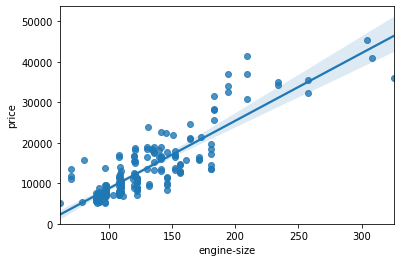

In [0]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

stats.pearsonr(df['engine-size'],df['price'])

(0.8095745670036559, 6.369057428260101e-48)


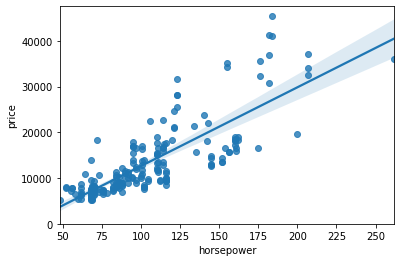

In [0]:
sns.regplot(x='horsepower', y='price', data=df)
plt.ylim(0,)

print(stats.pearsonr(df['horsepower'], df['price']))

(0.584641822265508, 8.076488270733218e-20)


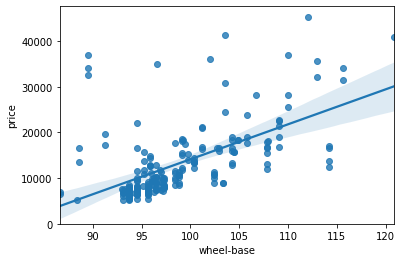

In [0]:
sns.regplot(x='wheel-base', y='price', data=df)
plt.ylim(0,)

print(stats.pearsonr(df['wheel-base'], df['price']))

## 6) ANOVA

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

In [0]:
df_anova = df[['drive-wheels', 'price']]
group_anova = df_anova.groupby(['drive-wheels'])
group_anova.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [0]:
group_anova.get_group('4wd')

,drive-wheels,price
4,4wd,17450.0
136,4wd,7603.0
140,4wd,9233.0
141,4wd,11259.0
144,4wd,8013.0
145,4wd,11694.0
150,4wd,7898.0
151,4wd,8778.0


In [0]:
group_anova.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [0]:
# ANOVA
f_val, p_val = stats.f_oneway(group_anova.get_group('fwd')['price'], 
                              group_anova.get_group('rwd')['price'], 
                              group_anova.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


**Comment:** Good result with a large F-score showing a strong correlation and a small value of P-value showing a strong certainty

In [0]:
# ANOVA
# Seperately: fwd and rwd
f_val, p_val = stats.f_oneway(group_anova.get_group('fwd')['price'], 
                              group_anova.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [0]:
# ANOVA
# Seperately: 4wd and rwd
f_val, p_val = stats.f_oneway(group_anova.get_group('4wd')['price'], 
                              group_anova.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [0]:
# ANOVA
# Seperately: 4wd and fwd
f_val, p_val = stats.f_oneway(group_anova.get_group('fwd')['price'], 
                              group_anova.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.6654657502523033 , P = 0.41620116697845666


In [0]:
df_drive_wheels = df[['drive-wheels', 'price']]
df_4wd = df_drive_wheels.groupby('drive-wheels').get_group('4wd')
df_rwd = df_drive_wheels.groupby('drive-wheels').get_group('rwd')